## Imports and Setups


In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os
from keras.models import load_model


## Real-time inference using webcam + Haar Cascade + OpenCV

[INFO] Starting webcam...


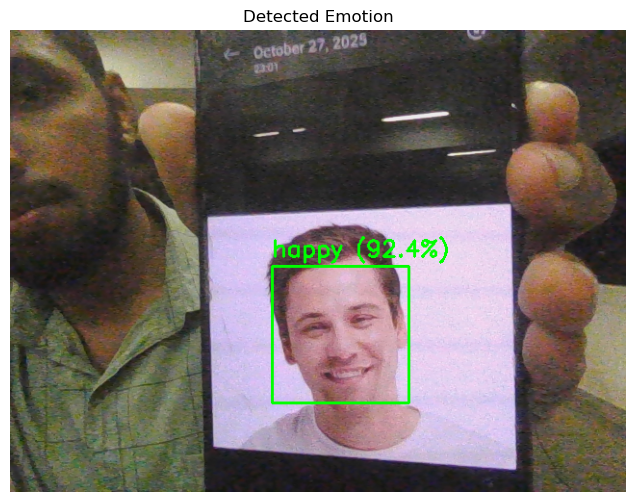

In [49]:
# ---------------- Load model ----------------
model = load_model('models/emotion_detection_model.h5')

# ---------------- Face detector ----------------
cascade_dir = "data"
cascade_path = os.path.join(cascade_dir, "haarcascade_frontalface_default.xml")
emotion_labels = ['happy', 'neutral', 'sad', 'surprise', 'stressed']

# Confidence threshold
CONFIDENCE_THRESHOLD = 0.7

# Start webcam
cap = cv2.VideoCapture(0)
print("[INFO] Starting webcam...")

ret, frame = cap.read()
if not ret:
    print("[ERROR] Unable to read from webcam.")
    cap.release()
else:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cascade_path)

    detected_label = None  # store detected emotion here

    if face_cascade.empty():
        print(f"[ERROR] Could not load cascade at: {cascade_path}")
    else:
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi = cv2.resize(roi_gray, (48, 48)) / 255.0
            roi = np.expand_dims(roi, axis=(0, -1))

            preds = model.predict(roi, verbose=0)
            confidence = np.max(preds)
            label = emotion_labels[np.argmax(preds)]

            if confidence > CONFIDENCE_THRESHOLD:
                text = f"{label} ({confidence*100:.1f}%)"
                color = (0, 255, 0)
                detected_label = label  # store latest confident label
            else:
                text = "Uncertain"
                color = (0, 0, 255)

            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
            cv2.putText(
                frame, text, (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2
            )

    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Detected Emotion")
    plt.show()

cap.release()

## Define the music classes (genres) for each emotion categories


In [50]:

emotion_to_music = {
    'happy': ['pop', 'dance', 'funk', 'upbeat indie', 'reggae'],
    'sad': ['acoustic', 'piano ballads', 'slow indie', 'lo-fi'],
    'neutral': ['ambient', 'lo-fi hip-hop', 'soft instrumental', 'jazz'],
    'surprise': ['electronic', 'future bass', 'cinematic', 'soundtracks'],
    'stressed': ['chillout', 'meditation', 'spa music', 'nature sounds', 'classical piano']
}

# List supported emotions
print("Supported Emotions:")
for emotion in emotion_to_music:
    print(f"- {emotion}")

Supported Emotions:
- happy
- sad
- neutral
- surprise
- stressed


## Print the music classes(genres) related to the real time emotion


In [51]:
# ---------------- Music Recommendation Function ----------------
def recommend_music_by_emotion(label):
    if label in emotion_to_music:
        print(f"\n🎵 Recommended music for '{label}' mood:")
        for genre in emotion_to_music[label]:
            print(f"• {genre}")
    else:
        print(f"\nNo emotions recognized. Try one of: {list(emotion_to_music.keys())}")

# Call the function with the detected label
if detected_label:
    recommend_music_by_emotion(detected_label)
else:
    print("\nNo emotion detected with enough confidence.")


🎵 Recommended music for 'happy' mood:
• pop
• dance
• funk
• upbeat indie
• reggae
